In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from IPython.display import display, Math

### Part 1

Exercise 1: Empirical limits in numpy

$$ f(x) = \cos(x\pi) + ln(x)^2$$

C:\Users\tulio.fernandes\AppData\Local\Temp\ipykernel_33204\3587983891.py:2: RuntimeWarning: divide by zero encountered in log
  return np.cos(x*np.pi) + np.log(x)**2


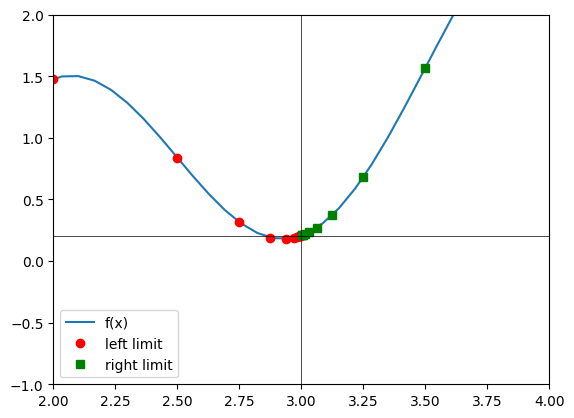

In [42]:
def f(x):
    return np.cos(x*np.pi) + np.log(x)**2

def zenos(a = 1,iterations = 10):
    """ 
    a: the number that oyou want to approximate
    iterations: number of iterations
    
    returns: xvals, limits
    """
    x0 = np.array([a-1,a+1])

    limits = np.zeros((iterations,2))
    xvals = np.zeros((iterations,2))

    for i in range(iterations):
        xvals[i,:] = x0
        limits[i,:] = f(x0)

        x0 = (x0+a)/2

    return xvals,limits

xvals,limits = zenos(a = 3,iterations = 10)

x = np.linspace(0, 6.5, 100)
plt.plot(x, f(x))
for i in range(len(xvals)):
    plt.plot(xvals[i,0],limits[i,0],'o', color = 'red',)
    plt.plot(xvals[i,1],limits[i,1],'s', color = 'green')
plt.axhline(f(3), color = 'black', lw = 0.5)
plt.axvline(3, color = 'black', lw = 0.5)
plt.xlim([2,4])
plt.ylim([-1,2])
plt.legend(['f(x)','left limit','right limit'])
plt.show()

mike code

Limit approaches 0.20694163722304226 from the left.
Limit approaches 0.20695628538689126 from the right.
Function value:  0.20694896081258207 at x=3.


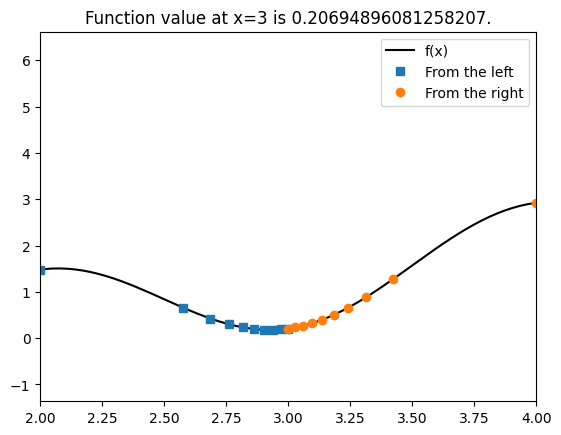

In [44]:
def fx(u):
  return np.cos(u*np.pi) + np.log(u)**2

xx = np.linspace(.1,2*np.pi,201)

# x-axis coordinates getting closer to 3
expFact = 4
g = 1.00001-np.linspace(1**expFact,.00001**expFact,10)**(1/expFact)
xFromLeft = 3-g
xFromRight = 3+g


# function values
limitFromLeft  = fx(xFromLeft)
limitFromRight = fx(xFromRight)

print(f'Limit approaches {limitFromLeft[0]} from the left.')
print(f'Limit approaches {limitFromRight[0]} from the right.')
print(f'Function value:  {fx(3)} at x=3.')


plt.plot(xx,fx(xx),'k',label='f(x)')
plt.plot(xFromLeft,limitFromLeft,'s',label='From the left')
plt.plot(xFromRight,limitFromRight,'o',label='From the right')
plt.legend()
plt.title(f'Function value at x=3 is {fx(3)}.')
plt.xlim([2,4])
plt.show()

Exercise 2: Analytic limits in sympy

$$ f(x) = \cos(x\pi) + ln(x)^2$$

In [48]:
x = sp.symbols('x')
fx = sp.cos(x*sp.pi) + sp.log(x)**2

# find the limit of the function as x approaches 3
limitAt3 = sp.limit(fx,x,3)
display(Math(f'\\lim_{{x \\to 3}} f(x) = {limitAt3}'))

# find the limit of the function as x approaches 3 from the left
limitAt3Left = sp.limit(fx,x,3,'-')
display(Math(f'\\lim_{{x \\to 3^-}} f(x) = {limitAt3Left}'))

# find the limit of the function as x approaches 3 from the right
limitAt3Right = sp.limit(fx,x,3,'+')
display(Math(f'\\lim_{{x \\to 3^+}} f(x) = {limitAt3Right}'))

# find the value of the function at x=3
fxAt3 = fx.subs(x,3)
display(Math(f'f(3) = {fxAt3}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Part 2

Exercise 3: Infinite limits

$$ f(x) = \frac{1}{(x-2)^2}$$

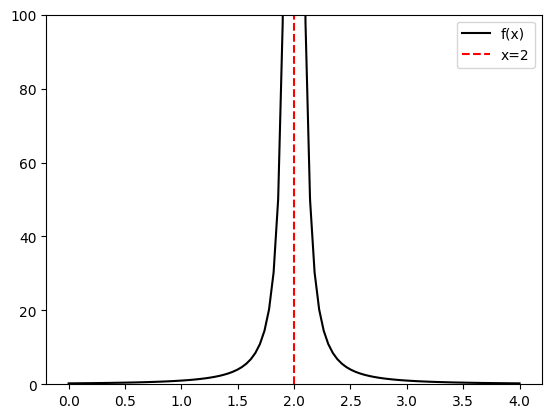

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [57]:
x = sp.symbols('x')
fx = 1/(x-2)**2

f = sp.lambdify(x,fx,'numpy')
xx = np.linspace(0,4,100)
plt.plot(xx,f(xx),'k',label='f(x)')
plt.axvline(2,color='r',label='x=2', linestyle='--')
plt.ylim([0,100])
plt.legend()
plt.show()

# find the limit of the function as x approaches 2
limitAt2Right = sp.limit(fx,x,2,'+') # or 'right'
display(Math(f'\\lim_{{x \\to 2^+}} f(x) = {limitAt2Right}'))

# find the limit of the function as x approaches 2 from the left
limitAt2Left = sp.limit(fx,x,2,'-') # or 'left'
display(Math(f'\\lim_{{x \\to 2^-}} f(x) = {limitAt2Left}'))

# find the limit of the function as x approaches 2 from two sides
limitAt2 = sp.limit(fx,x,2,'+-') # or 'both'
display(Math(f'\\lim_{{x \\to 2}} f(x) = {limitAt2}'))

Exercise 4: Undefined limits

$$ f(x) = \frac{\mid x-2\mid}{x-2} $$

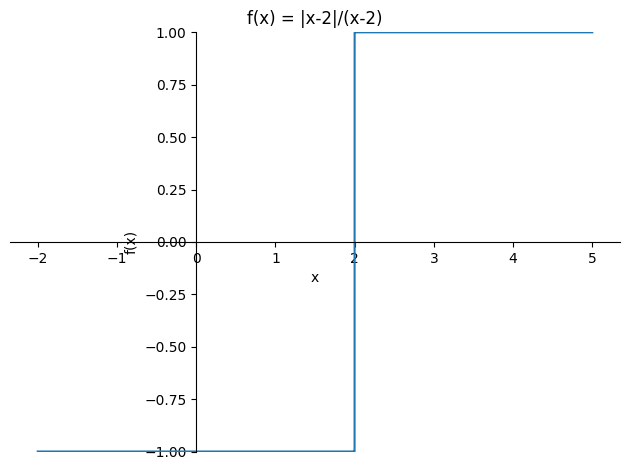

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [66]:
x = sp.symbols('x')
fx = sp.Abs(x-2)/(x-2)

sp.plot(fx,(x,-2,5),ylim=[-1,1],xlabel='x',ylabel='f(x)',title='f(x) = |x-2|/(x-2)',axis_center=(0,0))

# find the limit of the function as x approaches 2 from the left
limitAt2Left = sp.limit(fx,x,2,'-')
display(Math(f'\\lim_{{x \\to 2^-}} f(x) = {limitAt2Left}'))

# find the limit of the function as x approaches 2 from the right
limitAt2Right = sp.limit(fx,x,2,'+')
display(Math(f'\\lim_{{x \\to 2^+}} f(x) = {limitAt2Right}'))

# find the limit of the function as x approaches 2 from two sides
# limitAt2 = sp.limit(fx,x,2,'+-')
# display(Math(f'\\lim_{{x \\to 2}} f(x) = {limitAt2}'))

# this return an error because the limit does not exist

